# Example DNN code

## Library Import

In [365]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from keras import backend as K

In [366]:
def custom_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
    sen=tp/(tp+fn+K.epsilon())
    spe=tn/(tn+fp+K.epsilon())
    #p = tp / (tp + fp + K.epsilon())
    #r = tp / (tp + fn + K.epsilon())
    bal=(2*sen+spe)/(3+K.epsilon())
    bal = tf.where(tf.is_nan(bal), tf.zeros_like(bal), bal)
    #f1 = 2*p*r / (p+r+K.epsilon())
    #f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    print(tf.size(tp),tf.size(tn))
    return 1 - K.mean(bal)

### Data Loading

In [367]:
data = pd.read_csv("./BDA_train_data.csv")
data_patient = data.patient.values

In [368]:
test_data=pd.read_csv("./BDA_test_data_.csv")

In [369]:
test_data

,patient,ABL1,BRAF,CHEK1,FANCC,GATA3,JAK2,MITF,PDCD1LG2,RBM10,...,PBRM1,RB1,STAT3,ETV4,TMPRSS2,ETV5,BCR,ETV1,ETV6,MYB
0,TCGA-BJ-A0Z0-01,-0.255,0.398,-0.897,-0.663,0.629,1.175,0.422,0.614,0.949,...,0.632,0.246,-2.117,0.745,-2.117,0.094,-1.431,-1.431,0.578,1.157
1,GSM461115,0.991,0.362,1.032,-0.552,1.941,-0.334,-0.924,-1.671,1.039,...,0.781,1.392,1.260,-0.734,-0.980,0.270,0.831,-0.247,-0.102,1.520
2,TCGA-BP-4335-01,-0.645,0.118,-0.811,0.758,0.479,1.092,0.041,0.305,1.087,...,-0.535,0.149,-1.306,0.777,-2.633,-0.473,-0.407,-0.263,0.419,1.058
3,GSM769804,0.311,-0.228,0.435,-0.289,-0.213,-0.243,0.640,-0.147,-0.275,...,0.581,1.392,0.512,0.206,-0.039,-0.066,1.624,-0.143,0.083,1.350
4,TCGA-VS-A954-01,-2.200,0.425,-0.738,-0.868,0.574,1.113,0.229,0.474,0.448,...,-0.286,-0.034,-2.200,0.913,-2.200,-1.492,-0.664,-2.200,0.347,0.971
5,TCGA-64-5781-01,-0.072,0.225,-0.534,-1.119,0.242,1.185,0.253,0.447,1.101,...,-0.587,-0.043,-1.315,0.681,-2.209,-0.958,-0.652,-0.286,0.823,0.537
6,TCGA-BP-4960-01,-1.362,0.253,-0.089,0.730,0.399,1.025,-0.061,0.337,1.158,...,-0.780,-0.004,-1.270,0.716,-2.495,-0.862,-0.438,-0.262,0.398,1.031
7,TCGA-AY-6196-01,-1.820,0.268,-0.315,-1.319,0.392,0.991,0.327,0.169,0.986,...,-0.518,0.049,-0.207,0.723,-2.603,-0.593,-0.645,-1.065,0.702,0.685
8,TCGA-BH-A0B9-01,-0.809,0.366,-0.654,-1.513,0.809,1.292,0.419,0.492,0.703,...,-0.722,0.066,-1.300,1.045,-2.483,-1.513,-0.365,-1.389,0.563,0.581
9,TCGA-BR-8365-01,-1.914,0.075,0.230,-1.124,0.454,0.905,0.142,0.083,0.796,...,-0.783,0.121,-0.712,0.632,-2.734,-0.373,-0.795,-1.095,0.677,0.748


## Process Train Data - for model training

In [370]:
train_x = data.drop(["patient","result"],axis=1).values
train_y = data.result.values

print("Information of Training Data")
print("Samples : {}".format(train_x.shape[0]))
print("Features : {}".format(train_x.shape[1]))

Information of Training Data
Samples : 6561
Features : 308


In [371]:
test_x = test_data.drop(["patient"],axis=1).values

test_sample= test_data.patient.values
print("Information of Training Data")
print("Samples : {}".format(test_x.shape[0]))
print("Features : {}".format(test_x.shape[1]))

Information of Training Data
Samples : 6562
Features : 308


## Modeling & Training

In [486]:
layers=[256,128,64,50,30,10]

In [493]:
model = tf.keras.models.Sequential([
    
    # Layer 1
    tf.keras.layers.Dense(layers[0], input_shape=(len(data.columns[1:-1]),),activation='relu'),
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 2
    tf.keras.layers.Dense(layers[1], input_shape=(layers[0],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 3
    tf.keras.layers.Dense(layers[2], input_shape=(layers[1],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.0001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate

    # Layer 4
    tf.keras.layers.Dense(layers[3], input_shape=(layers[2],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 5
    tf.keras.layers.Dense(layers[4], input_shape=(layers[3],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate

    # Layer 6
    tf.keras.layers.Dense(layers[5], input_shape=(layers[4],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
  
    # Output Layer # 3
    tf.keras.layers.Dense(1, input_shape=(layers[2],),activation='sigmoid'),
])

# Set your learning rate
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), # Change your learning rate
              loss=tf.keras.losses.BinaryCrossentropy(), # "binary_crossentropy"
              metrics=['accuracy'])

In [107]:
# Set your layer nodes
#layers=[200,50,20,10]
  # Keep 1
layers=[50,30,20]

In [110]:
model = tf.keras.models.Sequential([
    
    # Layer 1
    tf.keras.layers.Dense(layers[0], input_shape=(len(data.columns[1:-1]),),activation='relu'),
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.2), # Change your dropout rate
    
    # Layer 2
    tf.keras.layers.Dense(layers[1], input_shape=(layers[0],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.2), # Change your dropout rate
    
    # Layer 3
    tf.keras.layers.Dense(layers[2], input_shape=(layers[1],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.0001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.2), # Change your dropout rate

    # Output Layer # 3
    tf.keras.layers.Dense(1, input_shape=(layers[2],),activation='sigmoid'),
])

# Set your learning rate
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), # Change your learning rate
              loss=tf.keras.losses.BinaryCrossentropy(), # "binary_crossentropy"
              metrics=['accuracy'])

Tensor("loss_21/dense_140_loss/Size:0", shape=(), dtype=int32) Tensor("loss_21/dense_140_loss/Size_1:0", shape=(), dtype=int32)


In [294]:
layers=[248,128,64,32,16,10]

In [295]:
model = tf.keras.models.Sequential([
    
    # Layer 1
    # 노드 개수를 받고 이어나가는
    tf.keras.layers.Dense(layers[0], input_shape=(len(data.columns[1:-1]),),activation='relu'),
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 2
    tf.keras.layers.Dense(layers[1], input_shape=(layers[0],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 3
    tf.keras.layers.Dense(layers[2], input_shape=(layers[1],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 4
    tf.keras.layers.Dense(layers[3], input_shape=(layers[2],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 5
    tf.keras.layers.Dense(layers[4], input_shape=(layers[3],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate

    # Layer 6
    tf.keras.layers.Dense(layers[5], input_shape=(layers[4],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate    
    
    # Output Layer
    tf.keras.layers.Dense(1, input_shape=(layers[5],),activation='sigmoid'),
])

# Set your learning rate
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), # Change your learning rate
              loss=tf.keras.losses.BinaryCrossentropy(), # "binary_crossentropy" ross를 줄이는 쪽으로 학습을 하는 바꿀수 있음
              metrics=['accuracy'])

In [565]:
layers=[200,100,50,40,30,20,10]

In [566]:
model = tf.keras.models.Sequential([
    
    # Layer 1
    tf.keras.layers.Dense(layers[0], input_shape=(len(data.columns[1:-1]),),activation='relu'),
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 2
    tf.keras.layers.Dense(layers[1], input_shape=(layers[0],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 3
    tf.keras.layers.Dense(layers[2], input_shape=(layers[1],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.0001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate

    # Layer 4
    tf.keras.layers.Dense(layers[3], input_shape=(layers[2],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
    
    # Layer 5
    tf.keras.layers.Dense(layers[4], input_shape=(layers[3],),activation='selu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate

    # Layer 5
    tf.keras.layers.Dense(layers[5], input_shape=(layers[4],),activation='relu'), 
    tf.keras.layers.BatchNormalization(axis=1, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones'),
    tf.keras.layers.Dropout(0.3), # Change your dropout rate
  
    # Output Layer # 3
    tf.keras.layers.Dense(1, input_shape=(layers[2],),activation='relu'),
])

# Set your learning rate
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0001), # Change your learning rate
              loss=tf.keras.losses.BinaryCrossentropy(), # "binary_crossentropy"
              metrics=['accuracy'])

In [567]:
hist=model.fit(train_x, train_y, batch_size=32, epochs=30,validation_split=0.2) # change batch size, epochs, validation split rate

Train on 5248 samples, validate on 1313 samples
Epoch 1/30
5248/5248 [==============================] - 26s 5ms/sample - loss: 6.7803 - acc: 0.4777 - val_loss: 0.5709 - val_acc: 0.8979
Epoch 2/30
5248/5248 [==============================] - 6s 1ms/sample - loss: 6.6964 - acc: 0.4872 - val_loss: 0.9108 - val_acc: 0.8660
Epoch 3/30
5248/5248 [==============================] - 7s 1ms/sample - loss: 6.3393 - acc: 0.5036 - val_loss: 0.7249 - val_acc: 0.9002
Epoch 4/30
5248/5248 [==============================] - 6s 1ms/sample - loss: 6.2317 - acc: 0.5137 - val_loss: 0.7476 - val_acc: 0.8949
Epoch 5/30
5248/5248 [==============================] - 6s 1ms/sample - loss: 6.1892 - acc: 0.5112 - val_loss: 0.5986 - val_acc: 0.9330
Epoch 6/30
5248/5248 [==============================] - 7s 1ms/sample - loss: 6.0497 - acc: 0.5280 - val_loss: 0.5787 - val_acc: 0.9276
Epoch 7/30
5248/5248 [==============================] - 7s 1ms/sample - loss: 5.9103 - acc: 0.5345 - val_loss: 0.5338 - val_acc: 0.9353

## Training Visualization

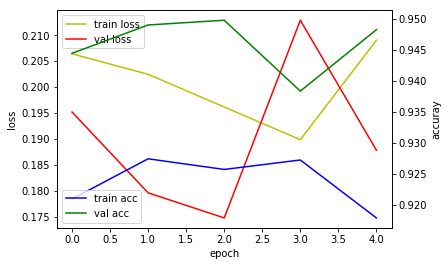

In [529]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_aixs = plt.subplots()

acc_aixs = loss_aixs.twinx()

loss_aixs.plot(hist.history['loss'], 'y', label='train loss')
loss_aixs.plot(hist.history['val_loss'], 'r', label='val loss')

acc_aixs.plot(hist.history['acc'], 'b', label='train acc')
acc_aixs.plot(hist.history['val_acc'], 'g', label='val acc')

loss_aixs.set_xlabel('epoch')
loss_aixs.set_ylabel('loss')
acc_aixs.set_ylabel('accuray')

loss_aixs.legend(loc='upper left')
acc_aixs.legend(loc='lower left')

plt.show()

## Model Evaluation

In [530]:
#Train performance
model.evaluate(train_x, train_y)

6561/6561 [==============================] - 3s 474us/sample - loss: 0.1148 - acc: 0.9596


[0.11481162726724681, 0.9596098]

In [531]:
# Test prediction using DNN model
test_h = model.predict(test_x)
test_p = (test_h > 0.5).astype(int).flatten()

In [532]:
pd.concat([df(test_h),df(test_p)],axis=1)

,0,0
0,0.982819,1
1,0.985052,1
2,0.982399,1
3,0.468602,0
4,0.991979,1
5,0.991725,1
6,0.989618,1
7,0.974186,1
8,0.995930,1
9,0.985147,1


In [533]:
df_test_pred=df(test_p)

In [534]:
test_result=pd.concat([df(test_sample),df_test_pred],axis=1)

In [535]:
test_result.columns=['patient','result']

In [536]:
test_result

,patient,result
0,TCGA-BJ-A0Z0-01,1
1,GSM461115,1
2,TCGA-BP-4335-01,1
3,GSM769804,0
4,TCGA-VS-A954-01,1
5,TCGA-64-5781-01,1
6,TCGA-BP-4960-01,1
7,TCGA-AY-6196-01,1
8,TCGA-BH-A0B9-01,1
9,TCGA-BR-8365-01,1


In [537]:
test_result.to_csv("./test_result_16.csv",index=False)